In [2]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
pd.options.display.max_columns = 50
pd.options.display.max_rows = 9999
import numpy as numpy

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from tqdm.notebook import tqdm

# 글꼴
if platform.system() == 'Windows':  # 윈도우인 경우, 맑은 고딕
    plt.rc('font', family='Malgun Gothic')

elif platform.system() == 'Darwin':  # Mac 인 경우, AppleGothic(기본 글꼴)
    plt.rc('font', family='AppleGothic')
else:  # 리눅스
    plt.rc('font', family='NanumBarunGothic')

# matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('rfm-2020-11-01-2021-01-31.csv')

In [3]:
df.shape

(918979, 10)

In [5]:
df.columns

Index(['ORDRR_MBER_NO', 'ORDER_CNT', 'ORDER_DETAIL_CNT',
       'ORDER_DETAIL_DSCNT_PC_SUM', 'ORDER_DETAIL_SELL_PC_SUM', 'RECENCY',
       'FREQUENCY', 'MONETARY', 'RFM', 'GRADE'],
      dtype='object')

In [4]:
df.head()

,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,6.0,13.0,255100.0,2607850,0.010989,0.352941,1.000000,0.454643,3등급
1,35,16.0,28.0,255100.0,1205570,0.208791,0.941176,1.000000,0.716656,4등급
2,80,8.0,8.0,255100.0,440200,0.186813,0.470588,1.000000,0.552467,3등급
3,88,17.0,20.0,255100.0,2031800,0.109890,1.000000,1.000000,0.703297,4등급
4,124,1.0,1.0,115100.0,132250,0.604396,0.058824,0.451196,0.371472,2등급


In [7]:
df['GRADE'].value_counts().to_frame()

,GRADE
2등급,457334
1등급,249476
3등급,168014
4등급,43473
5등급,682


# 추가작업

- 각 등급들의 최소, 최대를 통한 범주 기준 설정
- 범주 기준 구체화 및 타 데이터와 접목

In [3]:
df1 = pd.read_csv('rfm-2020-09-01-2020-11-30.csv')
df2 = pd.read_csv('rfm-2020-10-01-2020-12-31.csv')
df3 = pd.read_csv('rfm-2020-11-01-2021-01-31.csv')
df4 = pd.read_csv('rfm-2020-12-01-2021-02-28.csv')
df5 = pd.read_csv('rfm-2021-01-01-2021-03-31.csv')
df6 = pd.read_csv('rfm-2021-02-01-2021-04-30.csv')

In [4]:
print('df1:', df1.shape)
display(df1.head())
print('df2:',df2.shape)
display(df2.head())
print('df3:',df3.shape)
display(df3.head())
print('df4:',df4.shape)
display(df4.head())
print('df5:',df5.shape)
display(df5.head())
print('df6:',df6.shape)
display(df6.head())

df1: (890313, 10)


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,2.0,5.0,127300.0,133000,0.688889,0.086957,0.528523,0.434789,3등급
1,35,16.0,34.0,240860.0,1223590,0.888889,0.695652,1.000000,0.861514,5등급
2,80,5.0,5.0,240860.0,320800,0.866667,0.217391,1.000000,0.694686,4등급
3,88,19.0,23.0,240860.0,1478700,0.788889,0.826087,1.000000,0.871659,5등급
4,226,5.0,5.0,125190.0,128200,0.500000,0.217391,0.519763,0.412385,3등급


df2: (935218, 10)


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,7.0,17.0,256290.0,2700950,0.351648,0.333333,1.000000,0.561661,3등급
1,35,16.0,31.0,256290.0,1198900,0.549451,0.761905,1.000000,0.770452,4등급
2,80,7.0,7.0,256290.0,400400,0.527473,0.333333,1.000000,0.620269,4등급
3,88,20.0,24.0,256290.0,1259700,0.450549,0.952381,1.000000,0.800977,5등급
4,124,1.0,1.0,115100.0,132250,0.945055,0.047619,0.449101,0.480592,3등급


df3: (918979, 10)


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,6.0,13.0,255100.0,2607850,0.010989,0.352941,1.000000,0.454643,3등급
1,35,16.0,28.0,255100.0,1205570,0.208791,0.941176,1.000000,0.716656,4등급
2,80,8.0,8.0,255100.0,440200,0.186813,0.470588,1.000000,0.552467,3등급
3,88,17.0,20.0,255100.0,2031800,0.109890,1.000000,1.000000,0.703297,4등급
4,124,1.0,1.0,115100.0,132250,0.604396,0.058824,0.451196,0.371472,2등급


df4: (890725, 10)


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,8.0,15.0,233190.0,2638750,0.168539,0.5000,1.000000,0.556180,3등급
1,35,13.0,26.0,233190.0,862870,0.292135,0.8125,1.000000,0.701545,4등급
2,80,3.0,3.0,79700.0,119400,0.112360,0.1875,0.341781,0.213880,2등급
3,88,7.0,7.0,233190.0,1328600,0.292135,0.4375,1.000000,0.576545,3등급
4,124,1.0,1.0,115100.0,132250,0.280899,0.0625,0.493589,0.278996,2등급


df5: (936569, 10)


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,5.0,6.0,144790.0,172290,0.831461,0.333333,0.624229,0.596341,3등급
1,35,10.0,22.0,231950.0,654870,0.707865,0.666667,1.000000,0.791511,4등급
2,80,6.0,6.0,182700.0,252100,0.977528,0.400000,0.787670,0.721733,4등급
3,88,13.0,19.0,231950.0,1767800,0.853933,0.866667,1.000000,0.906866,5등급
4,226,9.0,16.0,231950.0,347600,0.831461,0.600000,1.000000,0.810487,5등급


df6: (1014186, 10)


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE
0,1,7.0,11.0,239635.0,300390,0.488636,0.4375,1.00000,0.642045,4등급
1,35,10.0,25.0,239635.0,734220,0.363636,0.6250,1.00000,0.662879,4등급
2,80,7.0,8.0,239635.0,317900,0.636364,0.4375,1.00000,0.691288,4등급
3,88,11.0,17.0,239635.0,935800,0.511364,0.6875,1.00000,0.732955,4등급
4,226,6.0,11.0,236800.0,265500,0.488636,0.3750,0.98817,0.617269,4등급


In [11]:
print('< df1 > \n', df1.isnull().sum())
print('< df2 > \n', df2.isnull().sum())
print('< df3 > \n', df3.isnull().sum())
print('< df4 > \n', df4.isnull().sum())
print('< df5 > \n', df5.isnull().sum())
print('< df6 > \n', df6.isnull().sum())

< df1 > 
 ORDRR_MBER_NO                0
ORDER_CNT                    0
ORDER_DETAIL_CNT             0
ORDER_DETAIL_DSCNT_PC_SUM    0
ORDER_DETAIL_SELL_PC_SUM     0
RECENCY                      0
FREQUENCY                    0
MONETARY                     0
RFM                          0
GRADE                        0
dtype: int64
< df2 > 
 ORDRR_MBER_NO                0
ORDER_CNT                    0
ORDER_DETAIL_CNT             0
ORDER_DETAIL_DSCNT_PC_SUM    0
ORDER_DETAIL_SELL_PC_SUM     0
RECENCY                      0
FREQUENCY                    0
MONETARY                     0
RFM                          0
GRADE                        0
dtype: int64
< df3 > 
 ORDRR_MBER_NO                0
ORDER_CNT                    0
ORDER_DETAIL_CNT             0
ORDER_DETAIL_DSCNT_PC_SUM    0
ORDER_DETAIL_SELL_PC_SUM     0
RECENCY                      0
FREQUENCY                    0
MONETARY                     0
RFM                          0
GRADE                        0
dtype: int64
<

# 가공 방향

In [ ]:
- 데이터 최소화한 후 작업 진행
- 데이터별 MONTH 컬럼 추가
- 월별, 등급별 Min, Max 작업해서 별도 파일로 추출 - 병합
 > RFM이 똑같은 경우의 데이터가 많아서(다른 열들의 값이 같은 경우도 있지만, 다를 수도 있지 않을까..?) 특정 열만 추출해서 계산
 > 회원번호 가져가려고 했지만 min, max 중복되어 제거
- min,max 별 별도의 라인을 그릴 것이기 때문에 min, max 값 표시 열 추가
- RFM, GRADE, MONTH, MinMax => 4개 컬럼

## month 컬럼 추가

In [12]:
df1['MONTH'] = '2020-11-30'
df2['MONTH'] = '2020-12-31'
df3['MONTH'] = '2021-01-31'
df4['MONTH'] = '2021-02-28'
df5['MONTH'] = '2021-03-31'
df6['MONTH'] = '2021-04-31'

In [13]:
print('df1:', df1.shape)
print('df2:',df2.shape)
print('df3:',df3.shape)
print('df4:',df4.shape)
print('df5:',df5.shape)
print('df6:',df6.shape)

df1: (890313, 11)
df2: (935218, 11)
df3: (918979, 11)
df4: (890725, 11)
df5: (936569, 11)
df6: (1014186, 11)


In [14]:
print('< df1 > \n', df1.isnull().sum())
print('< df2 > \n', df2.isnull().sum())
print('< df3 > \n', df3.isnull().sum())
print('< df4 > \n', df4.isnull().sum())
print('< df5 > \n', df5.isnull().sum())
print('< df6 > \n', df6.isnull().sum())

< df1 > 
 ORDRR_MBER_NO                0
ORDER_CNT                    0
ORDER_DETAIL_CNT             0
ORDER_DETAIL_DSCNT_PC_SUM    0
ORDER_DETAIL_SELL_PC_SUM     0
RECENCY                      0
FREQUENCY                    0
MONETARY                     0
RFM                          0
GRADE                        0
MONTH                        0
dtype: int64
< df2 > 
 ORDRR_MBER_NO                0
ORDER_CNT                    0
ORDER_DETAIL_CNT             0
ORDER_DETAIL_DSCNT_PC_SUM    0
ORDER_DETAIL_SELL_PC_SUM     0
RECENCY                      0
FREQUENCY                    0
MONETARY                     0
RFM                          0
GRADE                        0
MONTH                        0
dtype: int64
< df3 > 
 ORDRR_MBER_NO                0
ORDER_CNT                    0
ORDER_DETAIL_CNT             0
ORDER_DETAIL_DSCNT_PC_SUM    0
ORDER_DETAIL_SELL_PC_SUM     0
RECENCY                      0
FREQUENCY                    0
MONETARY                     0
RFM           

## 등급별 MIN&MAX 추출

### 작업본

In [87]:
df1[['RFM', 'GRADE','MONTH']].shape

(890313, 3)

In [86]:
df1[['RFM', 'GRADE','MONTH']].drop_duplicates().shape

(506662, 3)

In [33]:
grade_list = ['1등급', '2등급', '3등급', '4등급', '5등급']

In [136]:
df = pd.DataFrame(columns=['RFM', 'GRADE', 'MONTH', 'MinMax'])

In [137]:
df.head()

,RFM,GRADE,MONTH,MinMax


In [130]:
df1['MinMax'] = 0
df2['MinMax'] = 0
df3['MinMax'] = 0
df4['MinMax'] = 0
df5['MinMax'] = 0
df6['MinMax'] = 0

In [138]:
def extr_minmax(data):
    global grade_list
    global df
    data_dup = data[['RFM', 'GRADE','MONTH', 'MinMax']].drop_duplicates()
    for i in grade_list:
        df_min = data_dup[data_dup['GRADE'] == i].loc[data_dup[data_dup['GRADE'] == i]['RFM'] == data_dup[data_dup['GRADE'] == i]['RFM'].min()]
        df_min['MinMax'] = 'min'
        df_max = data_dup[data_dup['GRADE'] == i].loc[data_dup[data_dup['GRADE'] == i]['RFM'] == data_dup[data_dup['GRADE'] == i]['RFM'].max()]
        df_max['MinMax'] = 'max'
        df_mm = pd.concat([df_min, df_max])
        df = pd.concat([df, df_mm])
    print('done, {}'.format(df.shape))    

- RFM 값이 똑같은 경우가 있음. 필요한 열만 추출해서 중복제거한 후에 사용

In [139]:
extr_minmax(df1)
extr_minmax(df2)
extr_minmax(df3)
extr_minmax(df4)
extr_minmax(df5)
extr_minmax(df6)

done, (10, 4)
done, (20, 4)
done, (30, 4)
done, (40, 4)
done, (50, 4)
done, (60, 4)


In [140]:
df

,RFM,GRADE,MONTH,MinMax
6,0.014631,1등급,2020-11-30,min
513264,0.200000,1등급,2020-11-30,max
518240,0.200000,2등급,2020-11-30,min
490622,0.399998,2등급,2020-11-30,max
405728,0.400000,3등급,2020-11-30,min
345591,0.599990,3등급,2020-11-30,max
521695,0.600000,4등급,2020-11-30,min
43387,0.800000,4등급,2020-11-30,max
132923,0.800027,5등급,2020-11-30,min
11317,1.000000,5등급,2020-11-30,max


# 완료

In [141]:
df

,RFM,GRADE,MONTH,MinMax
6,0.014631,1등급,2020-11-30,min
513264,0.200000,1등급,2020-11-30,max
518240,0.200000,2등급,2020-11-30,min
490622,0.399998,2등급,2020-11-30,max
405728,0.400000,3등급,2020-11-30,min
345591,0.599990,3등급,2020-11-30,max
521695,0.600000,4등급,2020-11-30,min
43387,0.800000,4등급,2020-11-30,max
132923,0.800027,5등급,2020-11-30,min
11317,1.000000,5등급,2020-11-30,max


In [142]:
df.shape

(60, 4)

In [143]:
df['GRADE'].value_counts()

4등급    12
3등급    12
5등급    12
2등급    12
1등급    12
Name: GRADE, dtype: int64

In [148]:
df.to_excel('RFM_등급별_최고최고.xlsx', index=False) 

In [156]:
df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'min')]

,RFM,GRADE,MONTH,MinMax
6,0.014631,1등급,2020-11-30,min
555252,0.015886,1등급,2020-12-31,min
594594,0.020509,1등급,2021-01-31,min
59157,0.020976,1등급,2021-02-28,min
733082,0.023358,1등급,2021-03-31,min
724846,0.021807,1등급,2021-04-31,min


In [172]:
del df['RFM*100']

In [173]:
df['RFM100'] = df['RFM']*100

In [192]:
df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'min')]

,RFM,GRADE,MONTH,MinMax,RFM100
6,0.014631,1등급,2020-11-30,min,1.463115
555252,0.015886,1등급,2020-12-31,min,1.588602
594594,0.020509,1등급,2021-01-31,min,2.050945
59157,0.020976,1등급,2021-02-28,min,2.097628
733082,0.023358,1등급,2021-03-31,min,2.335752
724846,0.021807,1등급,2021-04-31,min,2.180704


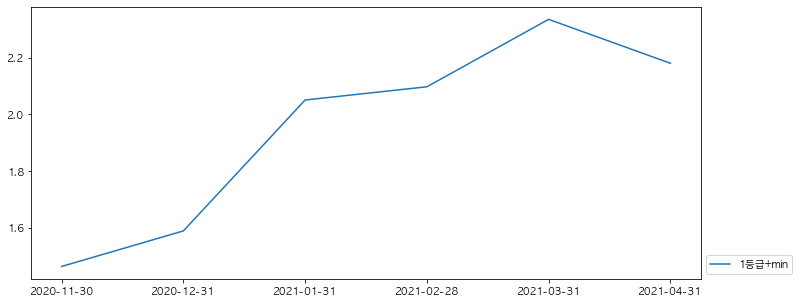

In [191]:
plt.figure(figsize=(12,5))
plt.plot(df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'min')].MONTH, df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'min')].RFM100, label='1등급+min')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

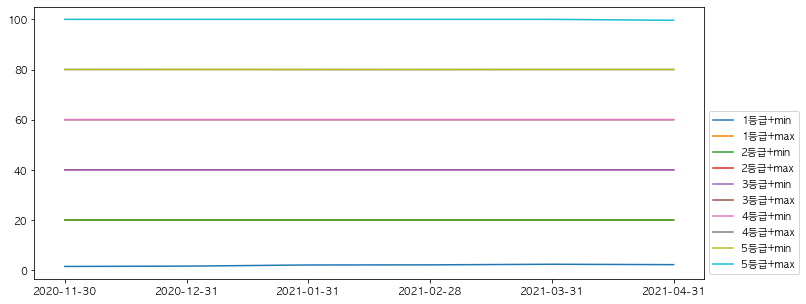

In [193]:
plt.figure(figsize=(12,5))

plt.plot(df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'min')].MONTH, df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'min')].RFM100, label='1등급+min')
plt.plot(df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'max')].MONTH, df[(df['GRADE'] == '1등급')&(df['MinMax'] == 'max')].RFM100, label='1등급+max')

plt.plot(df[(df['GRADE'] == '2등급')&(df['MinMax'] == 'min')].MONTH, df[(df['GRADE'] == '2등급')&(df['MinMax'] == 'min')].RFM100, label='2등급+min')
plt.plot(df[(df['GRADE'] == '2등급')&(df['MinMax'] == 'max')].MONTH, df[(df['GRADE'] == '2등급')&(df['MinMax'] == 'max')].RFM100, label='2등급+max')

plt.plot(df[(df['GRADE'] == '3등급')&(df['MinMax'] == 'min')].MONTH, df[(df['GRADE'] == '3등급')&(df['MinMax'] == 'min')].RFM100, label='3등급+min')
plt.plot(df[(df['GRADE'] == '3등급')&(df['MinMax'] == 'max')].MONTH, df[(df['GRADE'] == '3등급')&(df['MinMax'] == 'max')].RFM100, label='3등급+max')

plt.plot(df[(df['GRADE'] == '4등급')&(df['MinMax'] == 'min')].MONTH, df[(df['GRADE'] == '4등급')&(df['MinMax'] == 'min')].RFM100, label='4등급+min')
plt.plot(df[(df['GRADE'] == '4등급')&(df['MinMax'] == 'max')].MONTH, df[(df['GRADE'] == '4등급')&(df['MinMax'] == 'max')].RFM100, label='4등급+max')

plt.plot(df[(df['GRADE'] == '5등급')&(df['MinMax'] == 'min')].MONTH, df[(df['GRADE'] == '5등급')&(df['MinMax'] == 'min')].RFM100, label='5등급+min')
plt.plot(df[(df['GRADE'] == '5등급')&(df['MinMax'] == 'max')].MONTH, df[(df['GRADE'] == '5등급')&(df['MinMax'] == 'max')].RFM100, label='5등급+max')

#plt.yticks(np.arange(0, 1, 0.001))
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

In [188]:
df_all = pd.concat([df1,df2,df3, df4, df5, df6])

In [189]:
df_all['GRADE'].value_counts()

2등급    2584400
3등급    1238931
1등급    1220402
4등급     455944
5등급      86313
Name: GRADE, dtype: int64